# Introduction to Machine Learning and Data Science: Machine Learning basics with Diabetes and Aquatic Toxicity datasets

This notebook contains exercises for an introductory course on Machine Learning and Data Science, focusing on a regression and a classification problem with the QSAR Aquatic Toxicity and the Pima Indians Diabetes datasets, respectively.

We will cover essential steps in understanding, cleaning, transforming, and analyzing the data using pandas and matplotlib/seaborn. The exercises are divided into basic, intermediate, and advanced levels.

**Estimated Time**: 2 Hours



## Setup

We already used the Diabetes dataset last week, but here are the names of the columns, since it comes without them:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (0 for no diabetes, 1 for diabetes)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL for the Pima Indians Diabetes dataset
url_classification = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names_classification = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load dataset
diabetes_df = pd.read_csv(url_classification, names=names_classification)
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For the regression dataset, we will use the QSAR Aquatic Toxicity dataset, which was used to develop a quantitative structure-activity relationship models to predict aquatic toxicity towards the fish Pimephales promelas (fathead minnow). LC50, which is the concentration that causes death in 50% of test Daphnia Magma over a test duration of 48 hours, is the target.

In [3]:
url_regression = "https://raw.githubusercontent.com/readytensor/rt-datasets-regression/refs/heads/main/datasets/processed/aquatic_toxicity/aquatic_toxicity.csv"

aquatic_toxicity_df = pd.read_csv(url_regression)
aquatic_toxicity_df.head()

,Id,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


## Basic Exercisess (Approx. 45-60 minutes)

These exercises focus on the most basic fundamentals of the machine learning pipeline.

### Exercise 1: Splitting the Data

1. Separate features (`X`) and target (`y`).
2. Perform the data splitting with the `sklearn.model_selection.train_test_split`. Get the training, validation and test sets with a 60/20/20  split. **Only for classification dataset**: perform the splitting with the `stratify` option set to yes. It attempts to keep the percentages of the classes in the different sets.
3. Print the shape of both sets, to see how many attributes and samples there are in each.

In [4]:
# Your code for Exercise 1.1

# Dataset de clasificación (Diabetes)
print("=== DATASET DE CLASIFICACIÓN (Diabetes) ===")
X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']  # Objective

print(f"Características (X_diabetes): {X_diabetes.shape}")
print(f"Objetivo (y_diabetes): {y_diabetes.shape}")
print(f"Distribución de clases: {y_diabetes.value_counts().to_dict()}")

print("\n" + "="*50 + "\n")

# Dataset de regresión (Aquatic Toxicity)
print("=== DATASET DE REGRESIÓN (Aquatic Toxicity) ===")
# Asumiendo que la última columna es el target
X_aquatic = aquatic_toxicity_df.iloc[:, :-1]  # Todas las columnas excepto la última
y_aquatic = aquatic_toxicity_df.iloc[:, -1]   # Última columna como target

print(f"Características (X_aquatic): {X_aquatic.shape}")
print(f"Objetivo (y_aquatic): {y_aquatic.shape}")
print(f"Columnas de características: {list(X_aquatic.columns)}")
print(f"Nombre de la variable objetivo: {y_aquatic.name}")


=== DATASET DE CLASIFICACIÓN (Diabetes) ===
Características (X_diabetes): (768, 8)
Objetivo (y_diabetes): (768,)
Distribución de clases: {0: 500, 1: 268}


=== DATASET DE REGRESIÓN (Aquatic Toxicity) ===
Características (X_aquatic): (546, 9)
Objetivo (y_aquatic): (546,)
Columnas de características: ['Id', 'TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040']
Nombre de la variable objetivo: LC50


In [5]:
# Your code for Exercise 1.2
from sklearn.model_selection import train_test_split

print("=== DIVISIÓN DE DATOS ===\n")

# Dataset de clasificación con straify
print("--- Dataset de Clasificación (Diabetes) ---")
# Primera división: 60% train, 40% test
X_train_diab, X_temp_diab, y_train_diab, y_temp_diab = train_test_split(
    X_diabetes, y_diabetes, 
    test_size=0.4, 
    random_state=42, 
    stratify=y_diabetes  # Estratificación para mantener proporción de clases
)

# Segunda división: 20% validation, 20% test (del 40% temporal)
X_val_diab, X_test_diab, y_val_diab, y_test_diab = train_test_split(
    X_temp_diab, y_temp_diab, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp_diab  # Estratificación
)

print("División con estratificación")

print("\n--- Dataset de Regresión (Aquatic Toxicity) ---")
# Primera división: 60% train, 40% temp
X_train_aqua, X_temp_aqua, y_train_aqua, y_temp_aqua = train_test_split(
    X_aquatic, y_aquatic, 
    test_size=0.4, 
    random_state=42
    # Sin estratificación para regresión
)

# Segunda división: 20% validation, 20% test (del 40% temporal)
X_val_aqua, X_test_aqua, y_val_aqua, y_test_aqua = train_test_split(
    X_temp_aqua, y_temp_aqua, 
    test_size=0.5, 
    random_state=42
)

print("División sin estratificación")

=== DIVISIÓN DE DATOS ===

--- Dataset de Clasificación (Diabetes) ---
División con estratificación

--- Dataset de Regresión (Aquatic Toxicity) ---
División sin estratificación


In [6]:
# Your code for Exercise 1.3

print("=== FORMAS DE LOS CONJUNTOS DE DATOS ===\n")

print("--- Dataset de Clasificación (Diabetes) ---")
print(f"Conjunto de entrenamiento:")
print(f"  X_train: {X_train_diab.shape} | y_train: {y_train_diab.shape}")
print(f"Conjunto de validación:")
print(f"  X_val: {X_val_diab.shape} | y_val: {y_val_diab.shape}")
print(f"Conjunto de prueba:")
print(f"  X_test: {X_test_diab.shape} | y_test: {y_test_diab.shape}")


total_samples_diab = len(diabetes_df)
train_pct_diab = len(X_train_diab) / total_samples_diab * 100
val_pct_diab = len(X_val_diab) / total_samples_diab * 100
test_pct_diab = len(X_test_diab) / total_samples_diab * 100

print(f"\nPorcentajes: Train={train_pct_diab:.1f}% | Val={val_pct_diab:.1f}% | Test={test_pct_diab:.1f}%")

# Verificar estratificación
print(f"\nDistribución de clases:")
print(f"  Train: {y_train_diab.value_counts(normalize=True).round(3).to_dict()}")
print(f"  Val:   {y_val_diab.value_counts(normalize=True).round(3).to_dict()}")
print(f"  Test:  {y_test_diab.value_counts(normalize=True).round(3).to_dict()}")

print("\n" + "-"*60 + "\n")

print("--- Dataset de Regresión (Aquatic Toxicity) ---")
print(f"Conjunto de entrenamiento:")
print(f"  X_train: {X_train_aqua.shape} | y_train: {y_train_aqua.shape}")
print(f"Conjunto de validación:")
print(f"  X_val: {X_val_aqua.shape} | y_val: {y_val_aqua.shape}")
print(f"Conjunto de prueba:")
print(f"  X_test: {X_test_aqua.shape} | y_test: {y_test_aqua.shape}")


total_samples_aqua = len(aquatic_toxicity_df)
train_pct_aqua = len(X_train_aqua) / total_samples_aqua * 100
val_pct_aqua = len(X_val_aqua) / total_samples_aqua * 100
test_pct_aqua = len(X_test_aqua) / total_samples_aqua * 100

print(f"\nPorcentajes: Train={train_pct_aqua:.1f}% | Val={val_pct_aqua:.1f}% | Test={test_pct_aqua:.1f}%")

print(f"\nEstadísticas del objetivo (regresión):")
print(f"  Train - Media: {y_train_aqua.mean():.3f}, Std: {y_train_aqua.std():.3f}")
print(f"  Val   - Media: {y_val_aqua.mean():.3f}, Std: {y_val_aqua.std():.3f}")
print(f"  Test  - Media: {y_test_aqua.mean():.3f}, Std: {y_test_aqua.std():.3f}")

=== FORMAS DE LOS CONJUNTOS DE DATOS ===

--- Dataset de Clasificación (Diabetes) ---
Conjunto de entrenamiento:
  X_train: (460, 8) | y_train: (460,)
Conjunto de validación:
  X_val: (154, 8) | y_val: (154,)
Conjunto de prueba:
  X_test: (154, 8) | y_test: (154,)

Porcentajes: Train=59.9% | Val=20.1% | Test=20.1%

Distribución de clases:
  Train: {0: 0.65, 1: 0.35}
  Val:   {0: 0.649, 1: 0.351}
  Test:  {0: 0.656, 1: 0.344}

------------------------------------------------------------

--- Dataset de Regresión (Aquatic Toxicity) ---
Conjunto de entrenamiento:
  X_train: (327, 9) | y_train: (327,)
Conjunto de validación:
  X_val: (109, 9) | y_val: (109,)
Conjunto de prueba:
  X_test: (110, 9) | y_test: (110,)

Porcentajes: Train=59.9% | Val=20.0% | Test=20.1%

Estadísticas del objetivo (regresión):
  Train - Media: 4.741, Std: 1.658
  Val   - Media: 4.632, Std: 1.564
  Test  - Media: 4.438, Std: 1.774


### Exercise 2: Training your first models
1. Train `LinearRegression` on the regression dataset (Aquatic Toxicity).
2. Train `LogisticRegression` on the classification dataset (Diabetes).
3. Predict on the test set for each.
4. Print first 5 predictions.

In [7]:
# Your code for Exercise 2.1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("=== ENTRENAMIENTO DE LINEAR REGRESSION ===")
print("Dataset: Aquatic Toxicity (Regresión)\n")

# Modelo de regresión lineal
linear_reg = LinearRegression()

# Entrenar el modelo
print("Entrenando Linear Regression...")
linear_reg.fit(X_train_aqua, y_train_aqua)
print("✓ Modelo entrenado exitosamente!")

# Información del modelo
print(f"\nInformación del modelo:")
print(f"Número de características: {linear_reg.n_features_in_}")
print(f"Coeficientes (primeros 5): {linear_reg.coef_[:5]}")
print(f"Intercepto: {linear_reg.intercept_:.4f}")

# Evaluación en training
train_pred_aqua = linear_reg.predict(X_train_aqua)
train_mse = mean_squared_error(y_train_aqua, train_pred_aqua)
train_r2 = r2_score(y_train_aqua, train_pred_aqua)

print(f"\nRendimiento en conjunto de entrenamiento:")
print(f"MSE: {train_mse:.4f}")
print(f"R²: {train_r2:.4f}")


=== ENTRENAMIENTO DE LINEAR REGRESSION ===
Dataset: Aquatic Toxicity (Regresión)

Entrenando Linear Regression...
✓ Modelo entrenado exitosamente!

Información del modelo:
Número de características: 9
Coeficientes (primeros 5): [-8.99354511e-05  2.87311202e-02 -1.71565969e-02  1.50712523e-01
  5.00578536e-01]
Intercepto: 2.6914

Rendimiento en conjunto de entrenamiento:
MSE: 1.4256
R²: 0.4800


In [8]:
# Your code for Exercise 2.2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("=== ENTRENAMIENTO DE LOGISTIC REGRESSION ===")
print("Dataset: Diabetes (Clasificación)\n")

# Crear el modelo de regresión logística
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
print("Entrenando Logistic Regression...")
logistic_reg.fit(X_train_diab, y_train_diab)
print("✓ Modelo entrenado exitosamente!")

# Información del modelo
print(f"\nInformación del modelo:")
print(f"Número de características: {logistic_reg.n_features_in_}")
print(f"Clases: {logistic_reg.classes_}")
print(f"Coeficientes (primeros 5): {logistic_reg.coef_[0][:5]}")
print(f"Intercepto: {logistic_reg.intercept_[0]:.4f}")

# Evaluación en conjunto de entrenamiento
train_pred_diab = logistic_reg.predict(X_train_diab)
train_accuracy = accuracy_score(y_train_diab, train_pred_diab)

print(f"\nRendimiento en conjunto de entrenamiento:")
print(f"Accuracy: {train_accuracy:.4f}")

=== ENTRENAMIENTO DE LOGISTIC REGRESSION ===
Dataset: Diabetes (Clasificación)

Entrenando Logistic Regression...
✓ Modelo entrenado exitosamente!

Información del modelo:
Número de características: 8
Clases: [0 1]
Coeficientes (primeros 5): [ 0.12872936  0.03606535 -0.01486572 -0.00315972 -0.00031116]
Intercepto: -8.2755

Rendimiento en conjunto de entrenamiento:
Accuracy: 0.7913


In [9]:
# Your code for Exercise 2.3
print("=== PREDICCIONES EN CONJUNTO DE PRUEBA ===\n")

# Predicciones para el de regresión
print("--- Linear Regression (Aquatic Toxicity) ---")
test_pred_aqua = linear_reg.predict(X_test_aqua)

# Métricas de evaluación de regresión
test_mse = mean_squared_error(y_test_aqua, test_pred_aqua)
test_mae = mean_absolute_error(y_test_aqua, test_pred_aqua)
test_r2 = r2_score(y_test_aqua, test_pred_aqua)

print(f"Métricas en conjunto de prueba:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R²: {test_r2:.4f}")

print(f"\nNúmero de predicciones: {len(test_pred_aqua)}")

print("\n" + "-"*50 + "\n")

# Predicciones para el modelo de clasificación
print("--- Logistic Regression (Diabetes) ---")
test_pred_diab = logistic_reg.predict(X_test_diab)
test_pred_proba_diab = logistic_reg.predict_proba(X_test_diab)

# Métricas de evaluación para clasificación
test_accuracy = accuracy_score(y_test_diab, test_pred_diab)

print(f"Métricas en conjunto de prueba:")
print(f"Accuracy: {test_accuracy:.4f}")

print(f"\nNúmero de predicciones: {len(test_pred_diab)}")

=== PREDICCIONES EN CONJUNTO DE PRUEBA ===

--- Linear Regression (Aquatic Toxicity) ---
Métricas en conjunto de prueba:
MSE: 1.4216
MAE: 0.9048
R²: 0.5441

Número de predicciones: 110

--------------------------------------------------

--- Logistic Regression (Diabetes) ---
Métricas en conjunto de prueba:
Accuracy: 0.7403

Número de predicciones: 154


In [10]:
# Your code for Exercise 2.4

print("=== PRIMERAS 5 PREDICCIONES ===\n")

# Mostrar las primeras predicciones del modelo de regresión
print("--- Linear Regression (Aquatic Toxicity) ---")
print("Valores reales vs Predicciones:")
print(f"{'Real':<10} {'Predicción':<12} {'Error':<10}")
print("-" * 35)
for i in range(5):
    real_val = y_test_aqua.iloc[i]
    pred_val = test_pred_aqua[i]
    error = abs(real_val - pred_val)
    print(f"{real_val:<10.4f} {pred_val:<12.4f} {error:<10.4f}")

print(f"\nPrimeras 5 predicciones (array): {test_pred_aqua[:5]}")

print("\n" + "-"*50 + "\n")

# Mostrar las primeras predicciones del modelo de clasificación
print("--- Logistic Regression (Diabetes) ---")
print("Valores reales vs Predicciones:")
print(f"{'Real':<6} {'Pred':<6} {'Prob_0':<10} {'Prob_1':<10} {'Correcto':<10}")
print("-" * 50)
for i in range(5):
    real_val = y_test_diab.iloc[i]
    pred_val = test_pred_diab[i]
    prob_0 = test_pred_proba_diab[i][0]
    prob_1 = test_pred_proba_diab[i][1]
    correct = "✓" if real_val == pred_val else "✗"
    print(f"{real_val:<6} {pred_val:<6} {prob_0:<10.4f} {prob_1:<10.4f} {correct:<10}")

print(f"\nPrimeras 5 predicciones (array): {test_pred_diab[:5]}")


print("\n" + "="*60)
print("RESUMEN FINAL")
print("="*60)
print(f"Linear Regression (Regresión):")
print(f"  - R² en test: {test_r2:.4f}")
print(f"  - MSE en test: {test_mse:.4f}")
print(f"\nLogistic Regression (Clasificación):")
print(f"  - Accuracy en test: {test_accuracy:.4f}")
print(f"  - Predicciones correctas: {sum(y_test_diab == test_pred_diab)}/{len(y_test_diab)}")

=== PRIMERAS 5 PREDICCIONES ===

--- Linear Regression (Aquatic Toxicity) ---
Valores reales vs Predicciones:
Real       Predicción   Error     
-----------------------------------
4.0710     5.6781       1.6071    
3.4800     3.7088       0.2288    
4.8380     6.4168       1.5788    
6.7560     5.5032       1.2528    
2.7780     3.7920       1.0140    

Primeras 5 predicciones (array): [5.67807576 3.70883304 6.41675398 5.50316138 3.79203863]

--------------------------------------------------

--- Logistic Regression (Diabetes) ---
Valores reales vs Predicciones:
Real   Pred   Prob_0     Prob_1     Correcto  
--------------------------------------------------
0      1      0.3799     0.6201     ✗         
1      0      0.5147     0.4853     ✗         
1      1      0.3457     0.6543     ✓         
0      1      0.3136     0.6864     ✗         
1      0      0.6573     0.3427     ✗         

Primeras 5 predicciones (array): [1 0 1 1 0]

RESUMEN FINAL
Linear Regression (Regresión):
  - 

### Exercise 3: Evaluate your models
1. For regression, use the following metrics to check how good your predictions were: `mean_squared_error`, `r2_score`.
2. Do the same for classification for these: `accuracy_score`, `confusion_matrix`
3. Interpret: Are predictions close? For classification, is there a clear tendency in the model (too many false positives, false negatives, etc.)?

In [11]:
# Your code for Exercise 3.1
from sklearn.metrics import mean_squared_error, r2_score

print("=== EVALUACIÓN DEL MODELO DE REGRESIÓN ===")
print("Dataset: Aquatic Toxicity - Linear Regression\n")

# Calcular métricas en test dataset
mse_test = mean_squared_error(y_test_aqua, test_pred_aqua)
r2_test = r2_score(y_test_aqua, test_pred_aqua)

print("MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"Mean Squared Error (MSE): {mse_test:.6f}")
print(f"R² Score: {r2_test:.6f}")

# Calcular métricas para training set para comparar
train_pred_aqua_eval = linear_reg.predict(X_train_aqua)
mse_train = mean_squared_error(y_train_aqua, train_pred_aqua_eval)
r2_train = r2_score(y_train_aqua, train_pred_aqua_eval)

print("\nMÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:")
print(f"Mean Squared Error (MSE): {mse_train:.6f}")
print(f"R² Score: {r2_train:.6f}")


print("\n" + "="*50)
print("ANÁLISIS DE LAS MÉTRICAS:")
print("="*50)

print(f"\nComparación MSE:")
print(f"  - Entrenamiento: {mse_train:.6f}")
print(f"  - Prueba: {mse_test:.6f}")
print(f"  - Diferencia: {abs(mse_test - mse_train):.6f}")

print(f"\nComparación R²:")
print(f"  - Entrenamiento: {r2_train:.6f}")
print(f"  - Prueba: {r2_test:.6f}")
print(f"  - Diferencia: {abs(r2_test - r2_train):.6f}")

# Interpretación del R²
print(f"\nInterpretación del R² en prueba ({r2_test:.4f}):")
if r2_test >= 0.8:
    print(" Excelente ajuste - El modelo explica muy bien la varianza")
elif r2_test >= 0.6:
    print("  Buen ajuste - El modelo explica bien la varianza")
elif r2_test >= 0.4:
    print("Ajuste moderado - El modelo explica parcialmente la varianza")
elif r2_test >= 0.2:
    print("Ajuste pobre - El modelo explica poco la varianza")
else:
    print("Ajuste muy pobre - El modelo no explica bien la varianza")

rmse_test = np.sqrt(mse_test)
print(f"\nRoot Mean Squared Error (RMSE): {rmse_test:.6f}")
print(f"Desviación estándar de y_test: {y_test_aqua.std():.6f}")
print(f"Ratio RMSE/std: {rmse_test/y_test_aqua.std():.4f}")

=== EVALUACIÓN DEL MODELO DE REGRESIÓN ===
Dataset: Aquatic Toxicity - Linear Regression

MÉTRICAS EN CONJUNTO DE PRUEBA:
Mean Squared Error (MSE): 1.421631
R² Score: 0.544123

MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:
Mean Squared Error (MSE): 1.425613
R² Score: 0.479951

ANÁLISIS DE LAS MÉTRICAS:

Comparación MSE:
  - Entrenamiento: 1.425613
  - Prueba: 1.421631
  - Diferencia: 0.003982

Comparación R²:
  - Entrenamiento: 0.479951
  - Prueba: 0.544123
  - Diferencia: 0.064172

Interpretación del R² en prueba (0.5441):
Ajuste moderado - El modelo explica parcialmente la varianza

Root Mean Squared Error (RMSE): 1.192322
Desviación estándar de y_test: 1.773997
Ratio RMSE/std: 0.6721


=== EVALUACIÓN DEL MODELO DE CLASIFICACIÓN ===
Dataset: Diabetes - Logistic Regression

MÉTRICAS EN CONJUNTO DE PRUEBA:
Accuracy Score: 0.740260
Accuracy en porcentaje: 74.03%

Confusion Matrix:
[[87 14]
 [26 27]]

MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:
Accuracy Score: 0.791304
Accuracy en porcentaje: 79.13%

Confusion Matrix:
[[267  32]
 [ 64  97]]

ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN:

Conjunto de PRUEBA:
Matriz de confusión:
                 Predicho
            No-Diab  Diabético
Real No-Diab     87       14
   Diabético     26       27

Métricas derivadas de la matriz de confusión:
True Positives (TP):  27
True Negatives (TN):  87
False Positives (FP): 14
False Negatives (FN): 26

Métricas de rendimiento:
Sensitivity (Recall): 0.5094 - 50.9%
Specificity:          0.8614 - 86.1%
Precision:            0.6585 - 65.9%
F1-Score:             0.5745

Comparación Accuracy:
  - Entrenamiento: 0.7913 (79.1%)
  - Prueba: 0.7403 (74.0%)
  - Diferencia: 0.0510

Interpretación del Accu

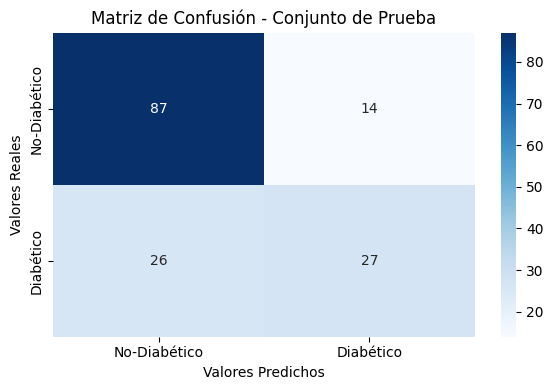

In [12]:
# Your code for Exercise 3.2
# ================================================================

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

print("=== EVALUACIÓN DEL MODELO DE CLASIFICACIÓN ===")
print("Dataset: Diabetes - Logistic Regression\n")

# Calcular métricas en testing diabetes
accuracy_test = accuracy_score(y_test_diab, test_pred_diab)
cm_test = confusion_matrix(y_test_diab, test_pred_diab)

print("MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"Accuracy Score: {accuracy_test:.6f}")
print(f"Accuracy en porcentaje: {accuracy_test*100:.2f}%")

print(f"\nConfusion Matrix:")
print(cm_test)

# También calcular para training set
train_pred_diab_eval = logistic_reg.predict(X_train_diab)
accuracy_train = accuracy_score(y_train_diab, train_pred_diab_eval)
cm_train = confusion_matrix(y_train_diab, train_pred_diab_eval)

print("\nMÉTRICAS EN CONJUNTO DE ENTRENAMIENTO:")
print(f"Accuracy Score: {accuracy_train:.6f}")
print(f"Accuracy en porcentaje: {accuracy_train*100:.2f}%")

print(f"\nConfusion Matrix:")
print(cm_train)

# confusion matrix
print("\n" + "="*50)
print("ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN:")
print("="*50)

print(f"\nConjunto de PRUEBA:")
print(f"Matriz de confusión:")
print(f"                 Predicho")
print(f"            No-Diab  Diabético")
print(f"Real No-Diab    {cm_test[0,0]:3d}      {cm_test[0,1]:3d}")
print(f"   Diabético    {cm_test[1,0]:3d}      {cm_test[1,1]:3d}")

# Calcular métricas derivadas
tn, fp, fn, tp = cm_test.ravel()
sensitivity = tp / (tp + fn)  # Recall, True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp)    # Precision
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nMétricas derivadas de la matriz de confusión:")
print(f"True Positives (TP):  {tp}")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")  
print(f"False Negatives (FN): {fn}")

print(f"\nMétricas de rendimiento:")
print(f"Sensitivity (Recall): {sensitivity:.4f} - {sensitivity*100:.1f}%")
print(f"Specificity:          {specificity:.4f} - {specificity*100:.1f}%")
print(f"Precision:            {precision:.4f} - {precision*100:.1f}%")
print(f"F1-Score:             {f1:.4f}")

# Comparación entre training y testing
print(f"\nComparación Accuracy:")
print(f"  - Entrenamiento: {accuracy_train:.4f} ({accuracy_train*100:.1f}%)")
print(f"  - Prueba: {accuracy_test:.4f} ({accuracy_test*100:.1f}%)")
print(f"  - Diferencia: {abs(accuracy_test - accuracy_train):.4f}")

# Accuracy
print(f"\nInterpretación del Accuracy en prueba ({accuracy_test:.4f}):")
if accuracy_test >= 0.9:
    print("Excelente rendimiento")
elif accuracy_test >= 0.8:
    print("Muy buen rendimiento")
elif accuracy_test >= 0.7:
    print("Buen rendimiento")
elif accuracy_test >= 0.6:
    print("Rendimiento moderado")
else:
    print("Rendimiento pobre")

print(f"\nVisualización de la matriz de confusión:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No-Diabético', 'Diabético'],
            yticklabels=['No-Diabético', 'Diabético'])
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.tight_layout()
plt.show()

## Intermediate Exercises (Approx. 45-60 minutes)

These exercises focus on comparing the performance of multiple models, performing cross-validation and using visualization techniques to understand better the results.

### Exercise 4: Compare multiple models
1. For the regression problem: Train and compare `LinearRegression`(already done), `DecisionTreeRegressor`, and `KNeighborsRegressor`.
2. For the classification problem: Train and compare `LogisticRegression` (already done), `KNeighborsClassifier`, and `DecisionTreeClassifier`.
3. Evaluate using R² score and accuracy each, respectively.
4. Which model performs best in each case? Why do you think that might be? Try to understand how the models work. Here is the documentation for each of them:
  - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
  - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
  - [KNeighborRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
  - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [13]:
# Your code for Exercise 4.1
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

print("=== EJERCICIO 4.1: COMPARACIÓN DE MODELOS DE REGRESIÓN ===")
print("Dataset: Aquatic Toxicity\n")

# Diccionario para modelos y resultados
regression_models = {}
regression_results = {}

# 1. Linear Regression
print("1. Linear Regression (ya entrenado)")
regression_models['Linear Regression'] = linear_reg
print("Modelo ya disponible")

# 2. Decision Tree Regressor
print("\n2. Decision Tree Regressor")
print("   Entrenando modelo...")
start_time = time.time()
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_reg.fit(X_train_aqua, y_train_aqua)
dt_time = time.time() - start_time
regression_models['Decision Tree'] = dt_reg
print(f"   Entrenado en {dt_time:.4f} segundos")
print(f"   Profundidad del árbol: {dt_reg.get_depth()}")
print(f"   Número de hojas: {dt_reg.get_n_leaves()}")

# 3. K-Neighbors Regressor
print("\n3. K-Neighbors Regressor")
print("   Entrenando modelo...")
start_time = time.time()
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_aqua, y_train_aqua)
knn_time = time.time() - start_time
regression_models['K-Neighbors'] = knn_reg
print(f"   Entrenado en {knn_time:.4f} segundos")
print(f"   Número de vecinos (k): {knn_reg.n_neighbors}")


print("\n" + "="*60)
print("EVALUACIÓN DE TODOS LOS MODELOS DE REGRESIÓN")
print("="*60)

for name, model in regression_models.items():
    print(f"\n--- {name} ---")
    
    # Predicciones
    train_pred = model.predict(X_train_aqua)
    test_pred = model.predict(X_test_aqua)
    
    # Métricas de training
    train_mse = mean_squared_error(y_train_aqua, train_pred)
    train_r2 = r2_score(y_train_aqua, train_pred)
    train_mae = mean_absolute_error(y_train_aqua, train_pred)
    
    # Métricas de testing
    test_mse = mean_squared_error(y_test_aqua, test_pred)
    test_r2 = r2_score(y_test_aqua, test_pred)
    test_mae = mean_absolute_error(y_test_aqua, test_pred)
    
    
    regression_results[name] = {
        'train_mse': train_mse,
        'train_r2': train_r2,
        'train_mae': train_mae,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'overfitting': abs(train_r2 - test_r2)
    }
    
    print(f"Entrenamiento - MSE: {train_mse:.6f}, R²: {train_r2:.6f}, MAE: {train_mae:.6f}")
    print(f"Prueba        - MSE: {test_mse:.6f}, R²: {test_r2:.6f}, MAE: {test_mae:.6f}")
    print(f"Overfitting (diff R²): {abs(train_r2 - test_r2):.6f}")

print("\n" + "="*60)

=== EJERCICIO 4.1: COMPARACIÓN DE MODELOS DE REGRESIÓN ===
Dataset: Aquatic Toxicity

1. Linear Regression (ya entrenado)
Modelo ya disponible

2. Decision Tree Regressor
   Entrenando modelo...
   Entrenado en 0.0132 segundos
   Profundidad del árbol: 10
   Número de hojas: 185

3. K-Neighbors Regressor
   Entrenando modelo...
   Entrenado en 0.0070 segundos
   Número de vecinos (k): 5

EVALUACIÓN DE TODOS LOS MODELOS DE REGRESIÓN

--- Linear Regression ---
Entrenamiento - MSE: 1.425613, R²: 0.479951, MAE: 0.898911
Prueba        - MSE: 1.421631, R²: 0.544123, MAE: 0.904811
Overfitting (diff R²): 0.064172

--- Decision Tree ---
Entrenamiento - MSE: 0.073590, R²: 0.973155, MAE: 0.141465
Prueba        - MSE: 2.083489, R²: 0.331884, MAE: 1.020555
Overfitting (diff R²): 0.641271

--- K-Neighbors ---
Entrenamiento - MSE: 1.718701, R²: 0.373036, MAE: 1.023098
Prueba        - MSE: 3.611262, R²: -0.158030, MAE: 1.482940
Overfitting (diff R²): 0.531066



In [14]:
# Your code for Exercise 4.2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("=== EJERCICIO 4.2: COMPARACIÓN DE MODELOS DE CLASIFICACIÓN ===")
print("Dataset: Diabetes\n")

classification_models = {}
classification_results = {}

# 1. Logistic Regression
print("1. Logistic Regression (ya entrenado)")
classification_models['Logistic Regression'] = logistic_reg
print("   ✓ Modelo ya disponible")

# 2. K-Neighbors Classifier
print("\n2. K-Neighbors Classifier")
print("   Entrenando modelo...")
start_time = time.time()
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_diab, y_train_diab)
knn_time = time.time() - start_time
classification_models['K-Neighbors'] = knn_clf
print(f"   Entrenado en {knn_time:.4f} segundos")
print(f"   Número de vecinos (k): {knn_clf.n_neighbors}")

# 3. Decision Tree Classifier
print("\n3. Decision Tree Classifier")
print("   Entrenando modelo...")
start_time = time.time()
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_clf.fit(X_train_diab, y_train_diab)
dt_time = time.time() - start_time
classification_models['Decision Tree'] = dt_clf
print(f"   Entrenado en {dt_time:.4f} segundos")
print(f"   Profundidad del árbol: {dt_clf.get_depth()}")
print(f"   Número de hojas: {dt_clf.get_n_leaves()}")


print("\n" + "="*60)
print("EVALUACIÓN DE TODOS LOS MODELOS DE CLASIFICACIÓN")
print("="*60)

for name, model in classification_models.items():
    print(f"\n--- {name} ---")
    
    # Predicciones
    train_pred = model.predict(X_train_diab)
    test_pred = model.predict(X_test_diab)
    
    # Métricas de training
    train_accuracy = accuracy_score(y_train_diab, train_pred)
    
    # Métricas de testing
    test_accuracy = accuracy_score(y_test_diab, test_pred)
    
    # confusion matrix
    cm = confusion_matrix(y_test_diab, test_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # other metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    

    classification_results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision,
        'f1_score': f1,
        'overfitting': abs(train_accuracy - test_accuracy),
        'confusion_matrix': cm
    }
    
    print(f"Entrenamiento - Accuracy: {train_accuracy:.6f} ({train_accuracy*100:.2f}%)")
    print(f"Prueba        - Accuracy: {test_accuracy:.6f} ({test_accuracy*100:.2f}%)")
    print(f"Overfitting (diff Acc): {abs(train_accuracy - test_accuracy):.6f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}, Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}, F1-Score: {f1:.4f}")
    print("Matriz de Confusión:")
    print(f"  TN: {tn}, FP: {fp}")
    print(f"  FN: {fn}, TP: {tp}")

print("\n" + "="*60)

=== EJERCICIO 4.2: COMPARACIÓN DE MODELOS DE CLASIFICACIÓN ===
Dataset: Diabetes

1. Logistic Regression (ya entrenado)
   ✓ Modelo ya disponible

2. K-Neighbors Classifier
   Entrenando modelo...
   Entrenado en 0.0017 segundos
   Número de vecinos (k): 5

3. Decision Tree Classifier
   Entrenando modelo...
   Entrenado en 0.0026 segundos
   Profundidad del árbol: 10
   Número de hojas: 73

EVALUACIÓN DE TODOS LOS MODELOS DE CLASIFICACIÓN

--- Logistic Regression ---
Entrenamiento - Accuracy: 0.791304 (79.13%)
Prueba        - Accuracy: 0.740260 (74.03%)
Overfitting (diff Acc): 0.051045
Sensitivity (Recall): 0.5094, Specificity: 0.8614
Precision: 0.6585, F1-Score: 0.5745
Matriz de Confusión:
  TN: 87, FP: 14
  FN: 26, TP: 27

--- K-Neighbors ---
Entrenamiento - Accuracy: 0.789130 (78.91%)
Prueba        - Accuracy: 0.707792 (70.78%)
Overfitting (diff Acc): 0.081338
Sensitivity (Recall): 0.5094, Specificity: 0.8119
Precision: 0.5870, F1-Score: 0.5455
Matriz de Confusión:
  TN: 82, FP: 19

=== EJERCICIO 4.3: COMPARACIÓN DE RESULTADOS Y VISUALIZACIÓN ===

RESUMEN DE MODELOS DE REGRESIÓN:
                   train_mse  train_r2  train_mae  test_mse   test_r2  \
Linear Regression   1.425613  0.479951   0.898911  1.421631  0.544123   
Decision Tree       0.073590  0.973155   0.141465  2.083489  0.331884   
K-Neighbors         1.718701  0.373036   1.023098  3.611262 -0.158030   

                   test_mae  overfitting  
Linear Regression  0.904811     0.064172  
Decision Tree      1.020555     0.641271  
K-Neighbors        1.482940     0.531066  

 MEJOR MODELO DE REGRESIÓN: Linear Regression
  R² en prueba: 0.544123

RESUMEN DE MODELOS DE CLASIFICACIÓN:
                    train_accuracy test_accuracy sensitivity specificity  \
Logistic Regression       0.791304       0.74026    0.509434    0.861386   
K-Neighbors                0.78913      0.707792    0.509434    0.811881   
Decision Tree             0.976087      0.642857    0.528302     0.70297   

                    p

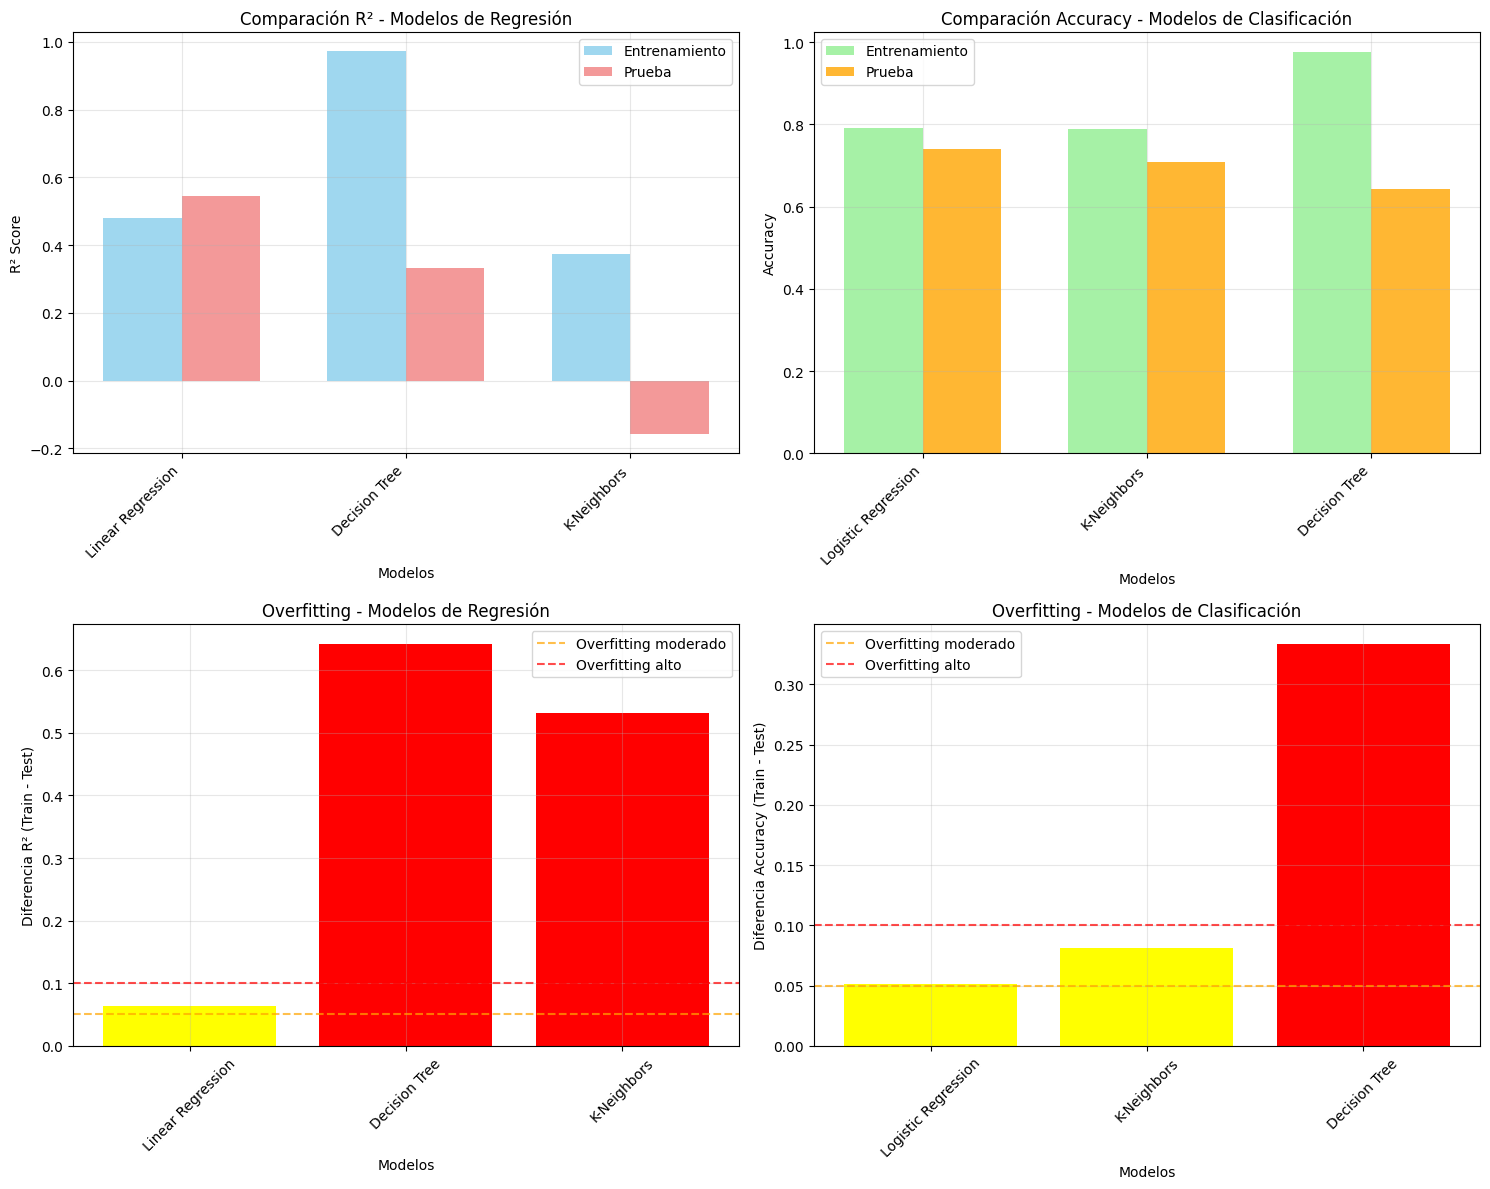


RANKING DE MODELOS

REGRESIÓN (ordenado por R² en prueba):
1. Linear Regression: R² = 0.544123, Overfitting = 0.064172
2. Decision Tree: R² = 0.331884, Overfitting = 0.641271
3. K-Neighbors: R² = -0.158030, Overfitting = 0.531066

CLASIFICACIÓN (ordenado por Accuracy en prueba):
1. Logistic Regression: Accuracy = 0.740260, F1 = 0.574468
2. K-Neighbors: Accuracy = 0.707792, F1 = 0.545455
3. Decision Tree: Accuracy = 0.642857, F1 = 0.504505


In [15]:
# Your code for Exercise 4.3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== EJERCICIO 4.3: COMPARACIÓN DE RESULTADOS Y VISUALIZACIÓN ===\n")

# Crear DataFrame of regression
print("RESUMEN DE MODELOS DE REGRESIÓN:")
print("="*50)
reg_df = pd.DataFrame(regression_results).T
reg_df = reg_df.round(6)
print(reg_df)

# better regression model
best_reg_model = reg_df['test_r2'].idxmax()
best_reg_r2 = reg_df.loc[best_reg_model, 'test_r2']
print(f"\n MEJOR MODELO DE REGRESIÓN: {best_reg_model}")
print(f"  R² en prueba: {best_reg_r2:.6f}")

## Crear DataFrame of classification
print("\n" + "="*50)
print("RESUMEN DE MODELOS DE CLASIFICACIÓN:")
print("="*50)
class_df = pd.DataFrame(classification_results).T
# Seleccionar columnas
numeric_cols = ['train_accuracy', 'test_accuracy', 'sensitivity', 'specificity', 'precision', 'f1_score', 'overfitting']
class_summary = class_df[numeric_cols].round(6)
print(class_summary)

#better classification model
best_class_model = class_df['test_accuracy'].idxmax()
best_class_acc = class_df.loc[best_class_model, 'test_accuracy']
print(f"\n MEJOR MODELO DE CLASIFICACIÓN: {best_class_model}")
print(f"   Accuracy en prueba: {best_class_acc:.6f} ({best_class_acc*100:.2f}%)")


print("\n" + "="*60)
print("VISUALIZACIONES COMPARATIVAS")
print("="*60)


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Comparación R² for regression
ax1 = axes[0, 0]
models_reg = list(regression_results.keys())
train_r2_values = [regression_results[model]['train_r2'] for model in models_reg]
test_r2_values = [regression_results[model]['test_r2'] for model in models_reg]

x_pos = range(len(models_reg))
width = 0.35
ax1.bar([x - width/2 for x in x_pos], train_r2_values, width, label='Entrenamiento', alpha=0.8, color='skyblue')
ax1.bar([x + width/2 for x in x_pos], test_r2_values, width, label='Prueba', alpha=0.8, color='lightcoral')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('R² Score')
ax1.set_title('Comparación R² - Modelos de Regresión')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_reg, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Comparación Accuracy for classification
ax2 = axes[0, 1]
models_class = list(classification_results.keys())
train_acc_values = [classification_results[model]['train_accuracy'] for model in models_class]
test_acc_values = [classification_results[model]['test_accuracy'] for model in models_class]

x_pos = range(len(models_class))
ax2.bar([x - width/2 for x in x_pos], train_acc_values, width, label='Entrenamiento', alpha=0.8, color='lightgreen')
ax2.bar([x + width/2 for x in x_pos], test_acc_values, width, label='Prueba', alpha=0.8, color='orange')
ax2.set_xlabel('Modelos')
ax2.set_ylabel('Accuracy')
ax2.set_title('Comparación Accuracy - Modelos de Clasificación')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models_class, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Overfitting comparison - Regresión
ax3 = axes[1, 0]
overfitting_reg = [regression_results[model]['overfitting'] for model in models_reg]
bars3 = ax3.bar(models_reg, overfitting_reg, color=['red' if x > 0.1 else 'yellow' if x > 0.05 else 'green' for x in overfitting_reg])
ax3.set_xlabel('Modelos')
ax3.set_ylabel('Diferencia R² (Train - Test)')
ax3.set_title('Overfitting - Modelos de Regresión')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
# Añadir líneas de referencia
ax3.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Overfitting moderado')
ax3.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Overfitting alto')
ax3.legend()

# 4. Overfitting comparison - Clasificación
ax4 = axes[1, 1]
overfitting_class = [classification_results[model]['overfitting'] for model in models_class]
bars4 = ax4.bar(models_class, overfitting_class, color=['red' if x > 0.1 else 'yellow' if x > 0.05 else 'green' for x in overfitting_class])
ax4.set_xlabel('Modelos')
ax4.set_ylabel('Diferencia Accuracy (Train - Test)')
ax4.set_title('Overfitting - Modelos de Clasificación')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)
# Añadir líneas de referencia
ax4.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Overfitting moderado')
ax4.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Overfitting alto')
ax4.legend()

plt.tight_layout()
plt.show()

# Ranking de modelos
print("\n" + "="*50)
print("RANKING DE MODELOS")
print("="*50)

print("\nREGRESIÓN (ordenado por R² en prueba):")
reg_ranking = reg_df.sort_values('test_r2', ascending=False)
for i, (model, row) in enumerate(reg_ranking.iterrows(), 1):
    print(f"{i}. {model}: R² = {row['test_r2']:.6f}, Overfitting = {row['overfitting']:.6f}")

print("\nCLASIFICACIÓN (ordenado por Accuracy en prueba):")
class_ranking = class_summary.sort_values('test_accuracy', ascending=False)
for i, (model, row) in enumerate(class_ranking.iterrows(), 1):
    print(f"{i}. {model}: Accuracy = {row['test_accuracy']:.6f}, F1 = {row['f1_score']:.6f}")

### Exercise 5: Cross-validation
1. Use `cross_val_score` for the best model in each case, with `cv=5`.
2. For classification, try both `accuracy` and `f1` as scoring methods, to compare the trainings in the cross-validation.
3. For the regression, use both `r2` and `neg_mean_squared_error`.
4. Print mean + std of the scores.

In [17]:
# Your code for Exercise 5.1 and 5.2
from sklearn.model_selection import cross_val_score
import numpy as np

print("=== EJERCICIO 5: CROSS-VALIDATION ===")
print("Usando cross_val_score con cv=5\n")

# Identificar el mejor modelo de clasificación de ejercicios anteriores
best_classification_model_name = max(classification_results.items(), key=lambda x: x[1]['test_accuracy'])[0]
best_classification_model = classification_models[best_classification_model_name]

print("=" * 60)
print("CROSS-VALIDATION PARA CLASIFICACIÓN")
print("=" * 60)
print(f" Mejor modelo: {best_classification_model_name}")
print(f"   Accuracy en test anterior: {classification_results[best_classification_model_name]['test_accuracy']:.6f}")

# Cross-validation con accuracy
print(f"\n Cross-Validation con ACCURACY (cv=5):")
print("-" * 40)

cv_accuracy_scores = cross_val_score(
    best_classification_model, 
    X_train_diab, 
    y_train_diab, 
    cv=5, 
    scoring='accuracy'
)

print(f"Scores individuales por fold:")
for i, score in enumerate(cv_accuracy_scores, 1):
    print(f"  Fold {i}: {score:.6f} ({score*100:.2f}%)")

accuracy_mean = cv_accuracy_scores.mean()
accuracy_std = cv_accuracy_scores.std()

print(f"\n Resultados ACCURACY:")
print(f"  Media: {accuracy_mean:.6f} ({accuracy_mean*100:.2f}%)")
print(f"  Desviación estándar: {accuracy_std:.6f} ({accuracy_std*100:.2f}%)")
print(f"  Rango: [{accuracy_mean-accuracy_std:.6f}, {accuracy_mean+accuracy_std:.6f}]")

# Cross-validation con f1
print(f"\n Cross-Validation con F1-SCORE (cv=5):")
print("-" * 40)

cv_f1_scores = cross_val_score(
    best_classification_model, 
    X_train_diab, 
    y_train_diab, 
    cv=5, 
    scoring='f1'
)

print(f"Scores individuales por fold:")
for i, score in enumerate(cv_f1_scores, 1):
    print(f"  Fold {i}: {score:.6f}")

f1_mean = cv_f1_scores.mean()
f1_std = cv_f1_scores.std()

print(f"\n Resultados F1-SCORE:")
print(f"  Media: {f1_mean:.6f}")
print(f"  Desviación estándar: {f1_std:.6f}")
print(f"  Rango: [{f1_mean-f1_std:.6f}, {f1_mean+f1_std:.6f}]")


print(f"\n COMPARACIÓN DE MÉTRICAS:")
print("-" * 40)
print(f"Accuracy - Media: {accuracy_mean:.6f} ± {accuracy_std:.6f}")
print(f"F1-Score - Media: {f1_mean:.6f} ± {f1_std:.6f}")

if accuracy_std < f1_std:
    print(" Accuracy muestra menor variabilidad entre folds")
else:
    print(" F1-Score muestra menor variabilidad entre folds")

if abs(accuracy_mean - f1_mean) < 0.01:
    print(" Las métricas son consistentes entre sí")
elif accuracy_mean > f1_mean:
    print("  Accuracy > F1-Score: posible desbalance de clases")
else:
    print("  F1-Score > Accuracy: métrica F1 es más optimista")

# Análisis de estabilidad
accuracy_cv_coeff = accuracy_std / accuracy_mean
f1_cv_coeff = f1_std / f1_mean

print(f"\n COEFICIENTE DE VARIACIÓN:")
print(f"Accuracy CV: {accuracy_cv_coeff:.4f}")
print(f"F1-Score CV: {f1_cv_coeff:.4f}")

if accuracy_cv_coeff < 0.1:
    print(" Modelo muy estable con Accuracy")
elif accuracy_cv_coeff < 0.2:
    print(" Modelo moderadamente estable con Accuracy")
else:
    print("  Modelo muestra variabilidad alta con Accuracy")


print(f"• El modelo {best_classification_model_name}:")
print(f"  - Rendimiento promedio de {accuracy_mean*100:.1f}% en accuracy")
print(f"  - Variabilidad de ±{accuracy_std*100:.1f}% entre folds")
print(f"  - F1-Score promedio de {f1_mean:.3f}")

=== EJERCICIO 5: CROSS-VALIDATION ===
Usando cross_val_score con cv=5

CROSS-VALIDATION PARA CLASIFICACIÓN
 Mejor modelo: Logistic Regression
   Accuracy en test anterior: 0.740260

 Cross-Validation con ACCURACY (cv=5):
----------------------------------------
Scores individuales por fold:
  Fold 1: 0.815217 (81.52%)
  Fold 2: 0.706522 (70.65%)
  Fold 3: 0.782609 (78.26%)
  Fold 4: 0.804348 (80.43%)
  Fold 5: 0.815217 (81.52%)

 Resultados ACCURACY:
  Media: 0.784783 (78.48%)
  Desviación estándar: 0.040902 (4.09%)
  Rango: [0.743881, 0.825685]

 Cross-Validation con F1-SCORE (cv=5):
----------------------------------------
Scores individuales por fold:
  Fold 1: 0.711864
  Fold 2: 0.571429
  Fold 3: 0.642857
  Fold 4: 0.678571
  Fold 5: 0.711864

 Resultados F1-SCORE:
  Media: 0.663317
  Desviación estándar: 0.052552
  Rango: [0.610765, 0.715869]

 COMPARACIÓN DE MÉTRICAS:
----------------------------------------
Accuracy - Media: 0.784783 ± 0.040902
F1-Score - Media: 0.663317 ± 0.05

In [18]:
# Your code for Exercise 5.1 and 5.3
from sklearn.model_selection import cross_val_score
import numpy as np

# Identificar el mejor modelo de regresión de ejercicios anteriores
best_regression_model_name = max(regression_results.items(), key=lambda x: x[1]['test_r2'])[0]
best_regression_model = regression_models[best_regression_model_name]

print("=" * 60)
print("CROSS-VALIDATION PARA REGRESIÓN")
print("=" * 60)
print(f" Mejor modelo identificado: {best_regression_model_name}")
print(f"   R² en test anterior: {regression_results[best_regression_model_name]['test_r2']:.6f}")

# Cross-validation con R²
print(f"\n Cross-Validation con R² SCORE (cv=5):")
print("-" * 40)

cv_r2_scores = cross_val_score(
    best_regression_model, 
    X_train_aqua, 
    y_train_aqua, 
    cv=5, 
    scoring='r2'
)

print(f"Scores individuales por fold:")
for i, score in enumerate(cv_r2_scores, 1):
    print(f"  Fold {i}: {score:.6f}")

r2_mean = cv_r2_scores.mean()
r2_std = cv_r2_scores.std()

print(f"\n Resultados R² SCORE:")
print(f"  Media: {r2_mean:.6f}")
print(f"  Desviación estándar: {r2_std:.6f}")
print(f"  Rango: [{r2_mean-r2_std:.6f}, {r2_mean+r2_std:.6f}]")

# Cross-validation con negative MSE
print(f"\n Cross-Validation con NEGATIVE MSE (cv=5):")
print("-" * 40)

cv_neg_mse_scores = cross_val_score(
    best_regression_model, 
    X_train_aqua, 
    y_train_aqua, 
    cv=5, 
    scoring='neg_mean_squared_error'
)

print(f"Scores individuales por fold:")
for i, score in enumerate(cv_neg_mse_scores, 1):
    mse_positive = -score  # Convertir a MSE positivo
    print(f"  Fold {i}: {score:.6f} (MSE: {mse_positive:.6f})")

neg_mse_mean = cv_neg_mse_scores.mean()
neg_mse_std = cv_neg_mse_scores.std()
mse_mean = -neg_mse_mean  # MSE positivo
mse_std = neg_mse_std     # La std se mantiene

print(f"\n Resultados NEGATIVE MSE:")
print(f"  Media: {neg_mse_mean:.6f}")
print(f"  Desviación estándar: {neg_mse_std:.6f}")
print(f"  Rango: [{neg_mse_mean-neg_mse_std:.6f}, {neg_mse_mean+neg_mse_std:.6f}]")

print(f"\n Resultados MSE (valores positivos):")
print(f"  Media: {mse_mean:.6f}")
print(f"  Desviación estándar: {mse_std:.6f}")
print(f"  RMSE Media: {np.sqrt(mse_mean):.6f}")

# Comparación entre métricas
print(f"\n COMPARACIÓN DE MÉTRICAS:")
print("-" * 40)
print(f"R² Score - Media: {r2_mean:.6f} ± {r2_std:.6f}")
print(f"MSE      - Media: {mse_mean:.6f} ± {mse_std:.6f}")
print(f"RMSE     - Media: {np.sqrt(mse_mean):.6f}")

# Análisis de estabilidad
r2_cv_coeff = abs(r2_std / r2_mean) if r2_mean != 0 else float('inf')
mse_cv_coeff = mse_std / mse_mean if mse_mean != 0 else float('inf')

print(f"\n COEFICIENTE DE VARIACIÓN:")
print(f"R² CV: {r2_cv_coeff:.4f}")
print(f"MSE CV: {mse_cv_coeff:.4f}")

if r2_cv_coeff < 0.1:
    print(" Modelo muy estable con R²")
elif r2_cv_coeff < 0.2:
    print(" Modelo moderadamente estable con R²")
else:
    print("  Modelo muestra variabilidad alta con R²")


print(f"\n INTERPRETACIÓN DEL RENDIMIENTO:")
if r2_mean >= 0.8:
    quality = "Excelente"
elif r2_mean >= 0.6:
    quality = "Bueno"
elif r2_mean >= 0.4:
    quality = "Moderado"
elif r2_mean >= 0.2:
    quality = "Pobre"
else:
    quality = "Muy pobre"

print(f"• Calidad del ajuste: {quality} (R² = {r2_mean:.3f})")
print(f"• El modelo {best_regression_model_name} explica {r2_mean*100:.1f}% de la varianza en promedio")
print(f"• Variabilidad entre folds: ±{r2_std:.3f} en R²")
print(f"• Error típico (RMSE): {np.sqrt(mse_mean):.3f}")


previous_test_r2 = regression_results[best_regression_model_name]['test_r2']
print(f"\n COMPARACIÓN CON TEST SET ANTERIOR:")
print(f"• R² en test set único: {previous_test_r2:.6f}")
print(f"• R² promedio en CV: {r2_mean:.6f}")
print(f"• Diferencia: {abs(previous_test_r2 - r2_mean):.6f}")

if abs(previous_test_r2 - r2_mean) < 0.05:
    print("UEEE")
else:
    print("OHHH")

CROSS-VALIDATION PARA REGRESIÓN
 Mejor modelo identificado: Linear Regression
   R² en test anterior: 0.544123

 Cross-Validation con R² SCORE (cv=5):
----------------------------------------
Scores individuales por fold:
  Fold 1: 0.467995
  Fold 2: 0.226604
  Fold 3: 0.515087
  Fold 4: 0.279435
  Fold 5: 0.398104

 Resultados R² SCORE:
  Media: 0.377445
  Desviación estándar: 0.109481
  Rango: [0.267964, 0.486926]

 Cross-Validation con NEGATIVE MSE (cv=5):
----------------------------------------
Scores individuales por fold:
  Fold 1: -1.658115 (MSE: 1.658115)
  Fold 2: -1.729430 (MSE: 1.729430)
  Fold 3: -1.861194 (MSE: 1.861194)
  Fold 4: -1.365632 (MSE: 1.365632)
  Fold 5: -1.382112 (MSE: 1.382112)

 Resultados NEGATIVE MSE:
  Media: -1.599297
  Desviación estándar: 0.195322
  Rango: [-1.794618, -1.403975]

 Resultados MSE (valores positivos):
  Media: 1.599297
  Desviación estándar: 0.195322
  RMSE Media: 1.264633

 COMPARACIÓN DE MÉTRICAS:
-------------------------------------

=== EJERCICIO 5.4: RESUMEN Y ANÁLISIS COMPARATIVO FINAL ===

 TABLA RESUMEN DE CROSS-VALIDATION:
Métrica              Modelo          Media        Std          CV Coeff  
--------------------------------------------------------------------------------
Classification (Accuracy) Logistic Regression 0.784783     0.040902     0.0521    
Classification (F1)  Logistic Regression 0.663317     0.052552     0.0792    
Regression (R²)      Linear Regression 0.377445     0.109481     0.2901    
Regression (MSE)     Linear Regression 1.599297     0.195322     0.1221    
--------------------------------------------------------------------------------

 ANÁLISIS DE ESTABILIDAD (Coeficiente de Variación):
Classification (Accuracy): Estable (CV = 0.0521)
Classification (F1): Estable (CV = 0.0792)
Regression (R²): Inestable (CV = 0.2901)
Regression (MSE): Moderadamente estable (CV = 0.1221)

 VISUALIZACIÓN :


C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_35300\77969398.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(classification_data, labels=classification_labels, patch_artist=True)
C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_35300\77969398.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2_r2 = ax2.boxplot([cv_r2_scores], positions=[1], labels=['R²'],
C:\Users\Alba Quiñones\AppData\Local\Temp\ipykernel_35300\77969398.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2_mse = ax2_twin.boxplot([mse_scores_display], positions=[2], labels=['MSE'],


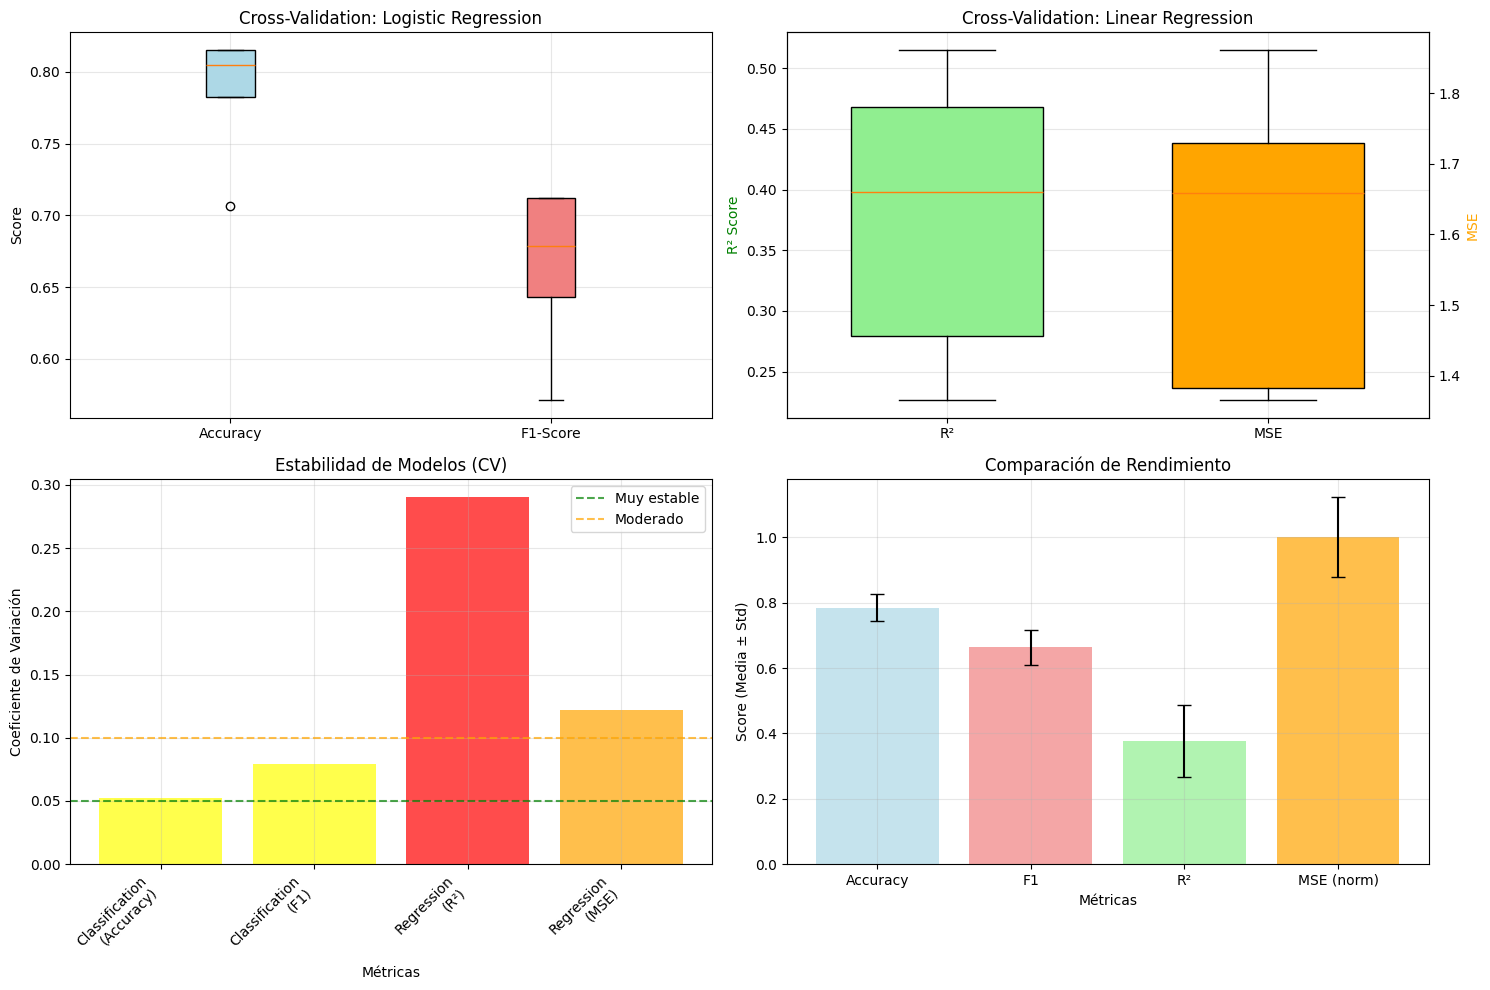


 CONCLUSIONES FINALES:

 MEJOR MODELO DE CLASIFICACIÓN: Logistic Regression
   • Accuracy: 0.7848 ± 0.0409
   • F1-Score: 0.6633 ± 0.0526
   • Estabilidad: Estable

 MEJOR MODELO DE REGRESIÓN: Linear Regression
   • R²: 0.3774 ± 0.1095
   • MSE: 1.5993 ± 0.1953
   • Estabilidad: Inestable


In [19]:
# Your code for Exercise 5.4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== EJERCICIO 5.4: RESUMEN Y ANÁLISIS COMPARATIVO FINAL ===\n")

# Recopilar todos los resultados de cross-validation
cv_results = {
    'Classification (Accuracy)': {
        'model': best_classification_model_name,
        'mean': accuracy_mean,
        'std': accuracy_std,
        'cv_coefficient': accuracy_std / accuracy_mean,
        'individual_scores': cv_accuracy_scores
    },
    'Classification (F1)': {
        'model': best_classification_model_name,
        'mean': f1_mean,
        'std': f1_std,
        'cv_coefficient': f1_std / f1_mean,
        'individual_scores': cv_f1_scores
    },
    'Regression (R²)': {
        'model': best_regression_model_name,
        'mean': r2_mean,
        'std': r2_std,
        'cv_coefficient': abs(r2_std / r2_mean) if r2_mean != 0 else 0,
        'individual_scores': cv_r2_scores
    },
    'Regression (MSE)': {
        'model': best_regression_model_name,
        'mean': mse_mean,
        'std': mse_std,
        'cv_coefficient': mse_std / mse_mean if mse_mean != 0 else 0,
        'individual_scores': -cv_neg_mse_scores  # Convertir a MSE positivo
    }
}

print(" TABLA RESUMEN DE CROSS-VALIDATION:")
print("=" * 80)
print(f"{'Métrica':<20} {'Modelo':<15} {'Media':<12} {'Std':<12} {'CV Coeff':<10}")
print("-" * 80)

for metric_name, results in cv_results.items():
    print(f"{metric_name:<20} {results['model']:<15} {results['mean']:<12.6f} "
          f"{results['std']:<12.6f} {results['cv_coefficient']:<10.4f}")

print("-" * 80)


print(f"\n ANÁLISIS DE ESTABILIDAD (Coeficiente de Variación):")
print("=" * 60)

stability_analysis = []
for metric_name, results in cv_results.items():
    cv_coeff = results['cv_coefficient']
    if cv_coeff < 0.05:
        stability = "Muy estable"

    elif cv_coeff < 0.1:
        stability = "Estable"

    elif cv_coeff < 0.2:
        stability = "Moderadamente estable"
 
    else:
        stability = "Inestable"

    
    stability_analysis.append({
        'metric': metric_name,
        'cv_coeff': cv_coeff,
        'stability': stability
    })
    
    print(f"{metric_name}: {stability} (CV = {cv_coeff:.4f})")


print(f"\n VISUALIZACIÓN :")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# clasificación
ax1 = axes[0, 0]
classification_data = [cv_accuracy_scores, cv_f1_scores]
classification_labels = ['Accuracy', 'F1-Score']
bp1 = ax1.boxplot(classification_data, labels=classification_labels, patch_artist=True)
bp1['boxes'][0].set_facecolor('lightblue')
bp1['boxes'][1].set_facecolor('lightcoral')
ax1.set_title(f'Cross-Validation: {best_classification_model_name}')
ax1.set_ylabel('Score')
ax1.grid(True, alpha=0.3)

# regresión
ax2 = axes[0, 1]
# Para MSE usamos valores pequeños para mejor visualización
mse_scores_display = -cv_neg_mse_scores
regression_data = [cv_r2_scores, mse_scores_display]
regression_labels = ['R²', 'MSE']


ax2_twin = ax2.twinx()
bp2_r2 = ax2.boxplot([cv_r2_scores], positions=[1], labels=['R²'], 
                     patch_artist=True, widths=0.6)
bp2_mse = ax2_twin.boxplot([mse_scores_display], positions=[2], labels=['MSE'], 
                          patch_artist=True, widths=0.6)
bp2_r2['boxes'][0].set_facecolor('lightgreen')
bp2_mse['boxes'][0].set_facecolor('orange')
ax2.set_title(f'Cross-Validation: {best_regression_model_name}')
ax2.set_ylabel('R² Score', color='green')
ax2_twin.set_ylabel('MSE', color='orange')
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['R²', 'MSE'])
ax2.grid(True, alpha=0.3)

#Comparación de estabilidad
ax3 = axes[1, 0]
metrics_for_plot = [sa['metric'] for sa in stability_analysis]
cv_coeffs = [sa['cv_coeff'] for sa in stability_analysis]
colors = ['green' if cv < 0.05 else 'yellow' if cv < 0.1 else 'orange' if cv < 0.2 else 'red' 
          for cv in cv_coeffs]

bars = ax3.bar(range(len(metrics_for_plot)), cv_coeffs, color=colors, alpha=0.7)
ax3.set_xlabel('Métricas')
ax3.set_ylabel('Coeficiente de Variación')
ax3.set_title('Estabilidad de Modelos (CV)')
ax3.set_xticks(range(len(metrics_for_plot)))
ax3.set_xticklabels([m.replace(' (', '\n(') for m in metrics_for_plot], rotation=45, ha='right')
ax3.axhline(y=0.05, color='green', linestyle='--', alpha=0.7, label='Muy estable')
ax3.axhline(y=0.1, color='orange', linestyle='--', alpha=0.7, label='Moderado')
ax3.legend()
ax3.grid(True, alpha=0.3)

#  Comparación mean ± std
ax4 = axes[1, 1]
# Normalizar valores para comparación visual
classification_means = [accuracy_mean, f1_mean]
classification_stds = [accuracy_std, f1_std]
regression_means_norm = [r2_mean, mse_mean/max(mse_mean, 1)]  # Normalizar MSE
regression_stds_norm = [r2_std, mse_std/max(mse_mean, 1)]

x_pos = np.arange(4)
means_all = classification_means + [r2_mean, mse_mean/max(mse_mean, 1)]
stds_all = classification_stds + [r2_std, mse_std/max(mse_mean, 1)]
labels_all = ['Accuracy', 'F1', 'R²', 'MSE (norm)']

bars = ax4.bar(x_pos, means_all, yerr=stds_all, capsize=5, 
               color=['lightblue', 'lightcoral', 'lightgreen', 'orange'], alpha=0.7)
ax4.set_xlabel('Métricas')
ax4.set_ylabel('Score (Media ± Std)')
ax4.set_title('Comparación de Rendimiento')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(labels_all)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"\n CONCLUSIONES FINALES:")
print("=" * 60)

print(f"\n MEJOR MODELO DE CLASIFICACIÓN: {best_classification_model_name}")
print(f"   • Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
print(f"   • F1-Score: {f1_mean:.4f} ± {f1_std:.4f}")
print(f"   • Estabilidad: {[sa['stability'] for sa in stability_analysis if 'Classification (Accuracy)' in sa['metric']][0]}")

print(f"\n MEJOR MODELO DE REGRESIÓN: {best_regression_model_name}")
print(f"   • R²: {r2_mean:.4f} ± {r2_std:.4f}")
print(f"   • MSE: {mse_mean:.4f} ± {mse_std:.4f}")
print(f"   • Estabilidad: {[sa['stability'] for sa in stability_analysis if 'Regression (R²)' in sa['metric']][0]}")


### Exercise 6: Classification report and visualization

1. Use the `classification_report` function for the classification problem ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to documentation)
2. Calculate the confusion matrix and plot it using `ConfusionMatrixDisplay`.

CLASSIFICATION REPORT:
----------------------------------------
              precision    recall  f1-score   support

 No Diabetes       0.77      0.86      0.81       101
    Diabetes       0.66      0.51      0.57        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



<Figure size 800x600 with 0 Axes>

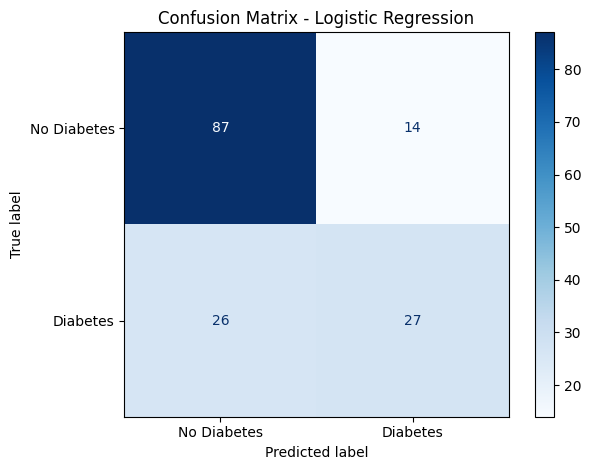

Total samples: 154
Correct predictions: 114
Accuracy: 0.7403


In [33]:
# Your code for Exercise 6.1, 6.2
# Alternative: If you want to customize the confusion matrix plot
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions
y_pred_diab = best_classification_model.predict(X_test_diab)

# 1. Classification Report with custom target names
print("CLASSIFICATION REPORT:")
print("-" * 40)
report = classification_report(
    y_test_diab, 
    y_pred_diab, 
    target_names=['No Diabetes', 'Diabetes']
)
print(report)

# 2. Confusion Matrix with custom visualization
cm = confusion_matrix(y_test_diab, y_pred_diab)

# Create figure with custom size
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Diabetes', 'Diabetes']
)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix - {best_classification_model_name}')
plt.tight_layout()
plt.show()

print(f"Total samples: {cm.sum()}")
print(f"Correct predictions: {cm[0,0] + cm[1,1]}")
print(f"Accuracy: {(cm[0,0] + cm[1,1]) / cm.sum():.4f}")

## Advanced Exercises (Approx. 45-60 min)

These exercises explore hyperparameter tuning methods and final model evaluation.



### Exercise 7: Hyperparameter tuning using Grid Search

1. Use `GridSearchCV` with `LogisticRegression`. Try this grid: `C=[0.01, 0.1, 1, 10]`, `penalty=['l1', 'l2']`, `solver='liblinear'`.
2. You can also run a cross validation with this function. Try a `cv=5`.
3. Print what the best parameters and score were.

`GridSearchCV` documentation: [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [37]:
# Exercise 7: Hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

print("=== EXERCISE 7: Hyperparameter Tuning using Grid Search ===\n")

# 1. Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create LogisticRegression with solver='liblinear'
lr = LogisticRegression(solver='liblinear', random_state=42)

# 2. Set up GridSearchCV with cv=5
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Running Grid Search...")
print(f"Parameter grid: {param_grid}")
print("Cross-validation folds: 5")

# Fit the grid search
grid_search.fit(X_train_diab, y_train_diab)

# 3. Print the best parameters and score
print("\nGRID SEARCH RESULTS:")
print("=" * 40)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best estimator: {grid_search.best_estimator_}")

# Test the best model on test set
best_lr_model = grid_search.best_estimator_
test_score = best_lr_model.score(X_test_diab, y_test_diab)
print(f"Test set accuracy: {test_score:.4f}")


=== EXERCISE 7: Hyperparameter Tuning using Grid Search ===

Running Grid Search...
Parameter grid: {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
Cross-validation folds: 5

GRID SEARCH RESULTS:
Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.7957
Best estimator: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
Test set accuracy: 0.7403


### Exercise 8: Hyperparameter tuning using Random Search

1. Use `RandomizedSearchCV` on the [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model (for regression). Sample only one parameter: `alpha` from `scipy.stats.uniform(0.01, 10)`.
2. Limit the random search to only 10 iterations.
3. Print the best alpha and score.

In [38]:
# Exercise 8: Hyperparameter tuning using Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from scipy.stats import uniform

print("=== EXERCISE 8: Hyperparameter Tuning using Random Search ===\n")

# 1. Define the parameter distribution
param_dist = {
    'alpha': uniform(0.01, 10)  # uniform distribution from 0.01 to 10.01
}

# Create Ridge model
ridge = Ridge(random_state=42)

# 2. Set up RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

print("Running Random Search...")
print(f"Parameter distribution: alpha ~ uniform(0.01, 10)")
print("Number of iterations: 10")

# Fit the random search
random_search.fit(X_train_aqua, y_train_aqua)

# 3. Print the best alpha and score
print("\nRANDOM SEARCH RESULTS:")
print("=" * 40)
print(f"Best alpha: {random_search.best_params_['alpha']:.4f}")
print(f"Best cross-validation score (R²): {random_search.best_score_:.4f}")

# Test the best model on test set
best_ridge_model = random_search.best_estimator_
test_score = best_ridge_model.score(X_test_aqua, y_test_aqua)
print(f"Test set R² score: {test_score:.4f}")


=== EXERCISE 8: Hyperparameter Tuning using Random Search ===

Running Random Search...
Parameter distribution: alpha ~ uniform(0.01, 10)
Number of iterations: 10

RANDOM SEARCH RESULTS:
Best alpha: 9.5171
Best cross-validation score (R²): 0.3802
Test set R² score: 0.5400


### Exercise 9: Final model & test evaluation

1. Take the best model from Grid/Random search
2. Predict on test set
3. Print final metrics


In [39]:
# Exercise 9: Final model & test evaluation
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
import numpy as np

print("=== EXERCISE 9: Final Model & Test Evaluation ===\n")

# 1. Take the best models from Grid/Random search
print("BEST MODELS FROM HYPERPARAMETER TUNING:")
print("=" * 50)
print(f"Classification (GridSearch): {grid_search.best_estimator_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Regression (RandomSearch): {random_search.best_estimator_}")
print(f"Best alpha: {random_search.best_params_['alpha']:.4f}")

# 2. Predict on test sets
print("\n" + "=" * 50)
print("PREDICTIONS ON TEST SETS:")
print("=" * 50)

# Classification predictions
y_pred_class = grid_search.best_estimator_.predict(X_test_diab)

# Regression predictions
y_pred_reg = random_search.best_estimator_.predict(X_test_aqua)

# 3. Print final metrics
print("\nFINAL METRICS:")
print("=" * 50)

# Classification metrics
class_accuracy = accuracy_score(y_test_diab, y_pred_class)
class_f1 = f1_score(y_test_diab, y_pred_class)

print("CLASSIFICATION METRICS:")
print(f"  Accuracy: {class_accuracy:.4f}")
print(f"  F1-Score: {class_f1:.4f}")

# Regression metrics
reg_r2 = r2_score(y_test_aqua, y_pred_reg)
reg_mse = mean_squared_error(y_test_aqua, y_pred_reg)
reg_rmse = np.sqrt(reg_mse)

print("\nREGRESSION METRICS:")
print(f"  R² Score: {reg_r2:.4f}")
print(f"  MSE: {reg_mse:.4f}")
print(f"  RMSE: {reg_rmse:.4f}")


=== EXERCISE 9: Final Model & Test Evaluation ===

BEST MODELS FROM HYPERPARAMETER TUNING:
Classification (GridSearch): LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')
Best parameters: {'C': 1, 'penalty': 'l1'}
Regression (RandomSearch): Ridge(alpha=np.float64(9.51714306409916), random_state=42)
Best alpha: 9.5171

PREDICTIONS ON TEST SETS:

FINAL METRICS:
CLASSIFICATION METRICS:
  Accuracy: 0.7403
  F1-Score: 0.5745

REGRESSION METRICS:
  R² Score: 0.5400
  MSE: 1.4346
  RMSE: 1.1978
